In [1]:
import numpy as np
import pandas as pd
from numpy import array
from sklearn.model_selection import KFold
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm
import statistics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
np.random.seed(42)

### 1. Loading the data set 

In [3]:
df = pd.read_csv('homework4_input_data.csv')

In [4]:
# Separating out the features
X = df.iloc[:, 1:3001].values
# Separating out the classes
Y = df.loc[:,['Class']].values

In [5]:
X.shape, Y.shape

((4336, 3000), (4336, 1))

In [6]:
Y

array([['Leukemia'],
       ['Leukemia'],
       ['Leukemia'],
       ...,
       ['Uterine'],
       ['Uterine'],
       ['Uterine']], dtype=object)

In [7]:
X

array([[ 3.93502728,  0.52332874,  0.        , ...,  5.8661166 ,
         0.        ,  7.56092342],
       [ 3.3728006 ,  0.        ,  0.        , ...,  6.51482474,
         0.28929827,  8.0238375 ],
       [ 4.19830069,  0.        ,  0.        , ...,  0.        ,
         0.        ,  8.03155279],
       ...,
       [ 7.77665898,  0.85936057,  2.01601459, ..., 10.18374811,
         4.84514751,  2.06955927],
       [ 8.42161913,  1.28789576,  0.        , ...,  6.31444431,
         1.89562167,  2.89979309],
       [ 6.67843251,  0.85936057,  5.17056877, ...,  0.        ,
         1.03854641,  1.52475732]])

In [8]:
df.head()

,id,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,Class
0,TCGA-AB-2828-03,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,...,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923,Leukemia
1,TCGA-AB-2846-03,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,...,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838,Leukemia
2,TCGA-AB-2870-03,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,...,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553,Leukemia
3,TCGA-AB-2872-03,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,...,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830,Leukemia
4,TCGA-AB-2881-03,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,...,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553,Leukemia


In [9]:
df.describe()

,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,ITGA3,...,SULT1B1,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL
count,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,...,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000,4336.000000
mean,6.493217,0.875979,2.547433,2.024070,2.788808,2.838891,2.413940,5.273215,4.531003,6.358596,...,1.347919,4.490551,1.933813,1.628066,2.083775,1.000454,7.176974,6.762318,1.764221,3.516539
std,1.341540,1.322937,1.712000,1.442751,1.385994,1.147753,1.535475,1.570749,1.198838,1.524787,...,1.342945,1.281910,1.314929,1.694187,1.368720,1.282440,1.285927,3.121063,1.190842,1.496502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.197540,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.807468,0.000000,0.000000,0.000000
25%,5.697111,0.000000,1.105780,0.999840,1.810114,2.055747,1.497904,4.215464,3.813267,5.600968,...,0.350634,3.745679,1.122227,0.288757,1.079199,0.000000,6.466050,5.784987,0.875012,2.394757
50%,6.588478,0.279846,2.391468,1.710090,2.679240,2.630627,2.061542,5.211668,4.398703,6.357384,...,0.897331,4.490178,1.567558,0.999664,1.784131,0.428042,7.346725,7.762936,1.421289,3.475282
75%,7.415357,1.159160,3.819411,2.976235,3.748897,3.439166,2.858414,6.405440,5.331706,7.364287,...,2.088001,5.119473,2.091528,2.583887,2.742996,1.499093,8.090525,8.925813,2.575496,4.371683
max,10.753816,6.531445,8.714974,7.458509,7.685174,7.041480,10.548175,10.840692,8.464498,10.031628,...,7.199111,9.034211,7.237835,7.120254,6.901291,5.933580,11.307692,14.115754,6.007571,8.039268


### 2. Producing a PCA plot of the input data

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [11]:
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)

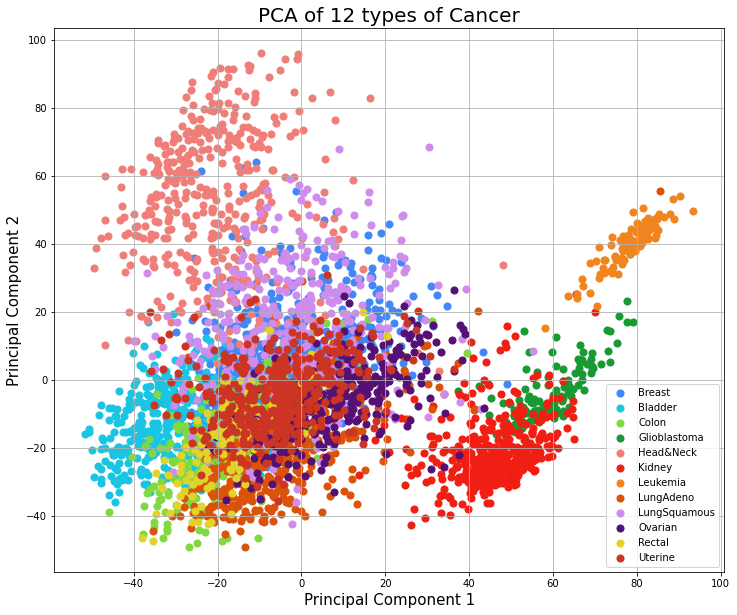

In [12]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA of 12 types of Cancer', fontsize = 20)
classes = ['Breast', 'Bladder', 'Colon', 'Glioblastoma', 'Head&Neck', 'Kidney', 'Leukemia', 'LungAdeno', 'LungSquamous', 'Ovarian', 'Rectal', 'Uterine']
colors = ['#4287f5', '#19c5e3', '#80d941', '#179933', '#f07e78', '#f01e13', '#f0841f', '#db5209', '#ce8ced', '#551075', '#e3d329', '#cc3423']
for item, color in zip(classes,colors):
    indicesToKeep = finalDf['Class'] == item
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(classes)
ax.grid()

### 3. Normalizing the data using StandardScaler

In [13]:
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

In [14]:
X_rescaled

array([[-1.90712548, -0.26659689, -1.48815802, ..., -0.28717918,
        -1.48166105,  2.70287004],
       [-2.32626443, -0.66222355, -1.48815802, ..., -0.07930675,
        -1.23869714,  3.01223639],
       [-1.71085564, -0.66222355, -1.48815802, ..., -2.16692113,
        -1.48166105,  3.01739253],
       ...,
       [ 0.95680383, -0.01256317, -0.3104437 , ...,  1.09636527,
         2.58748176, -0.96701899],
       [ 1.43762043,  0.31140135, -1.48815802, ..., -0.14351678,
         0.11035555, -0.41217216],
       [ 0.13807804, -0.01256317,  1.53238206, ..., -2.16692113,
        -0.60944949, -1.33111116]])

### 4. Splitting the data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3468, 3000), (3468, 1), (868, 3000), (868, 1))

### 5. Building SVM model and defining hyperparameters

#### Model 1: Linear SVM

In [16]:
model1 = LinearSVC().fit(X_train,Y_train)

C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


#### Model 2: SVM with RBF kernel

In [17]:
model2 = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
model2.fit(X_train, Y_train)

C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=100.0, gamma='auto', random_state=0, verbose=0)

### 6. Running and reporting results from 5-fold cross-validation

#### Results from Model 1

In [18]:
scores = cross_val_score(model1, X, Y, cv=5)
print("Individual cross-validation accuracies" + str(scores))

C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Checkout\anaconda3\lib\site-packages\

Individual cross-validation accuracies[0.9735023  0.9561707  0.96770473 0.95847751 0.96655133]


C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [19]:
avg1 = statistics.mean(scores)
print("Mean Cross Validation Accuracy is " + str(avg1))

Mean Cross Validation Accuracy is 0.9644813143473708


#### Results from Model 2

In [20]:
scores = cross_val_score(model2, X, Y, cv=5)
print("Individual cross-validation accuracies" + str(scores))

C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Checkout\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

Individual cross-validation accuracies[0.94354839 0.93310265 0.94463668 0.94348328 0.94579008]


In [21]:
avg2 = statistics.mean(scores)
print("Mean Cross Validation Accuracy is " + str(avg2))

Mean Cross Validation Accuracy is 0.9421122149049374


### 7. Computing prediction accuracy on the training and test sets

#### Accuracy of Model 1

In [22]:
print('Accuracy of linear SVC on training set: {:.2f}'.format(model1.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model1.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00
Accuracy of linear SVC on test set: 0.97


#### Accuracy of Model 2

In [23]:
print('Accuracy of SVC on training set: {:.2f}'.format(model2.score(X_train, Y_train)))

print('Accuracy of SVC on test set: {:.2f}'.format(model2.score(X_test, Y_test)))

Accuracy of SVC on training set: 1.00
Accuracy of SVC on test set: 0.96


### 8. Plotting confusion matrices for test set predictions

Confusion matrix, without normalization
[[ 59   0   0   0   0   0   0   0   0   0   0   0]
 [  0 191   0   0   0   0   0   0   0   0   0   0]
 [  0   0  59   0   0   0   0   0   0   0   7   0]
 [  0   0   0  28   0   0   0   0   0   0   0   0]
 [  0   0   0   0  81   0   0   0   0   0   0   0]
 [  0   0   0   0   0  88   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   1   0  85   1   0   0   0]
 [  0   0   0   0   0   0   0   2  67   0   0   0]
 [  0   0   0   0   0   0   0   0   0  74   0   0]
 [  0   0  16   0   0   0   0   0   0   0  15   0]
 [  0   0   0   0   0   0   0   0   0   0   0  74]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.89 0.   0.   0.   0.   0.   0.   0.   0.11 0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.

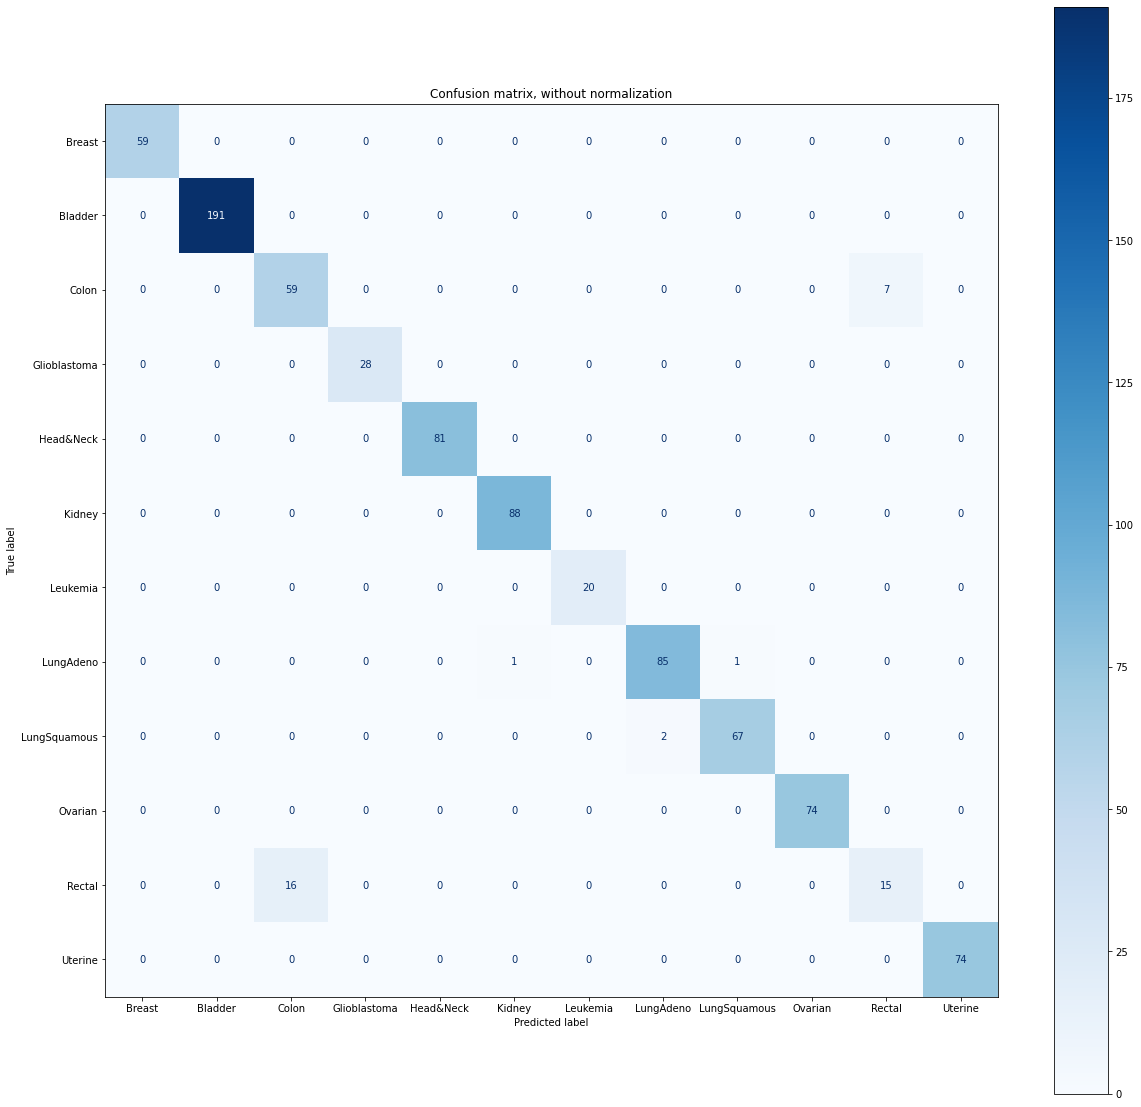

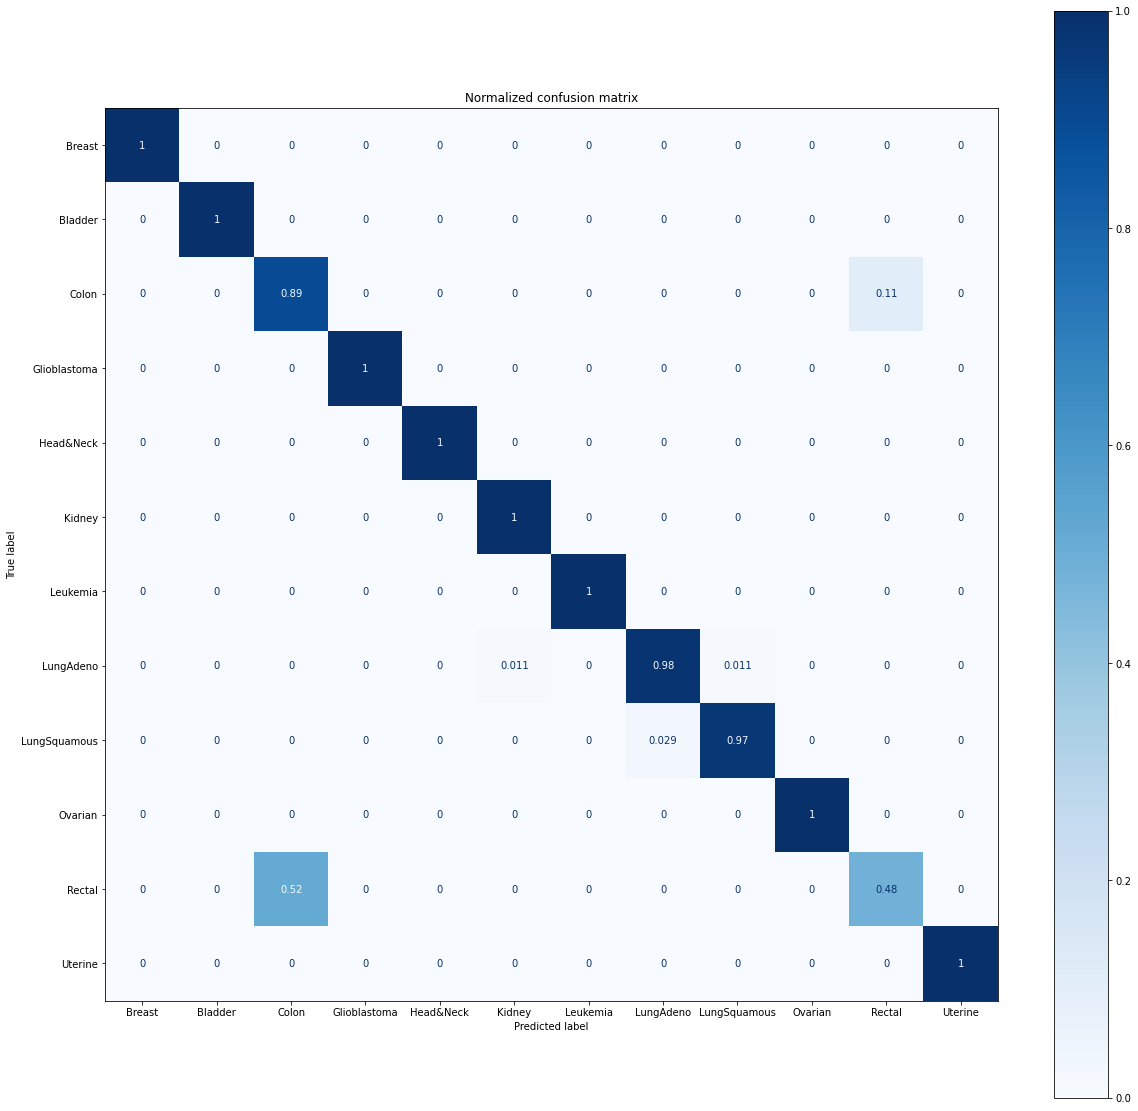

In [24]:
class_names = ['Breast', 'Bladder', 'Colon', 'Glioblastoma', 'Head&Neck', 'Kidney', 'Leukemia', 'LungAdeno', 'LungSquamous', 'Ovarian', 'Rectal', 'Uterine']

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
plt.rcParams["figure.figsize"]=(20,20)
for title, normalize in titles_options:                           #Finalizing model 1 due to higher prediction accuracy
    disp = plot_confusion_matrix(model1, X_test, Y_test,
                                 display_labels= class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()